In [1]:
import os
import numpy as np
import matplotlib as mpl
mpl.use("pgf")

import matplotlib.pyplot as plt

plt.rcParams.update({
    "pgf.texsystem":"pdflatex",
})

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
lw = 1
save = 1

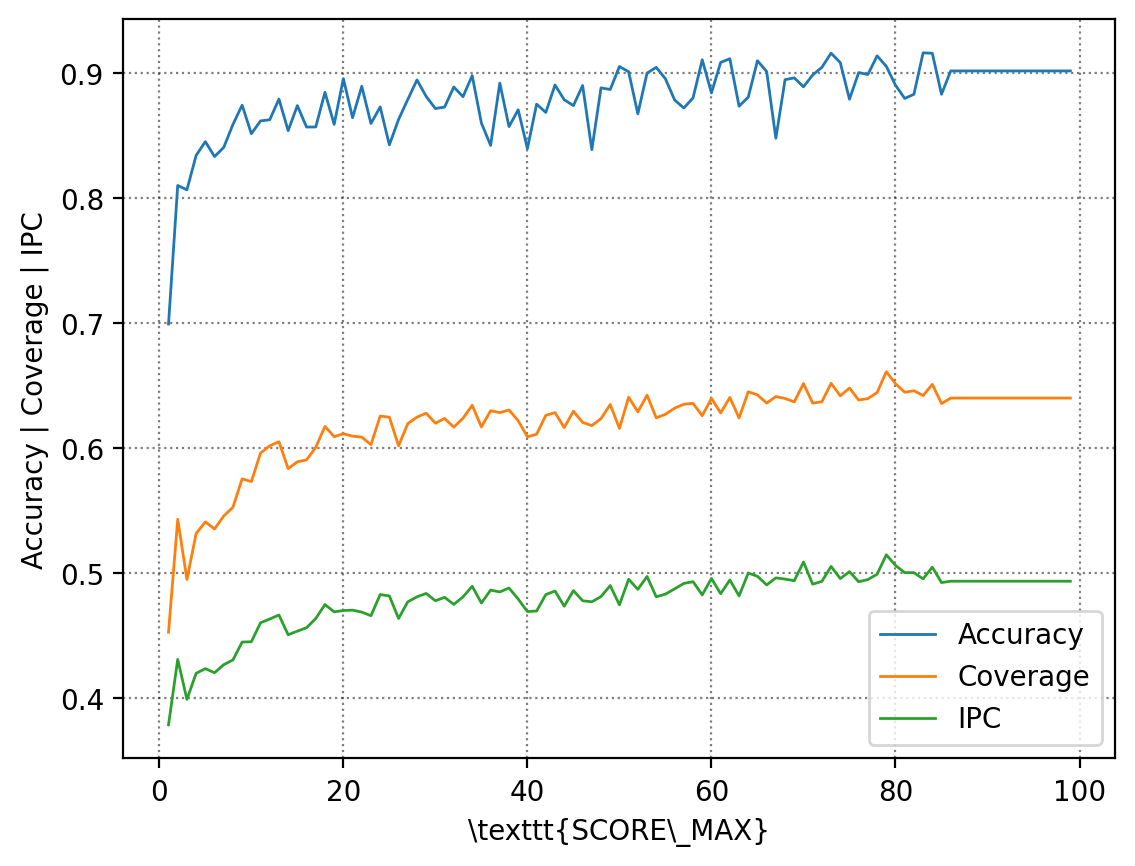

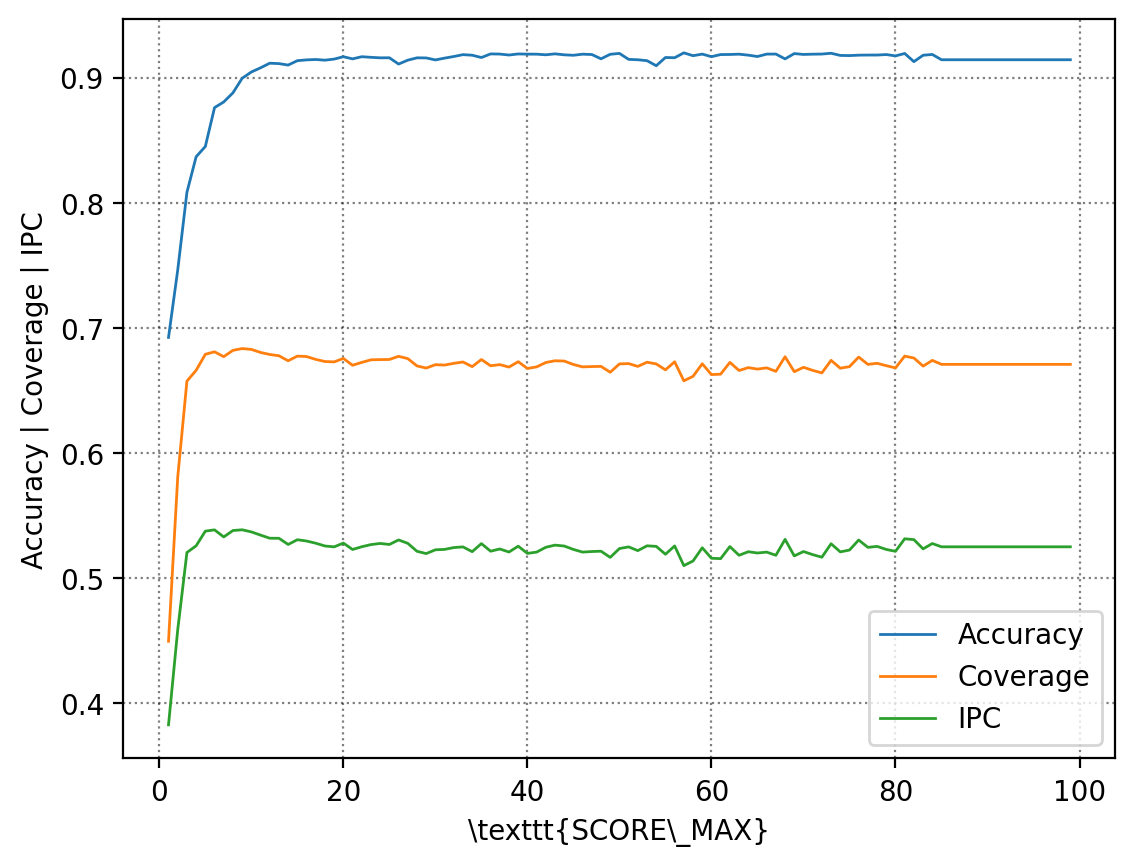

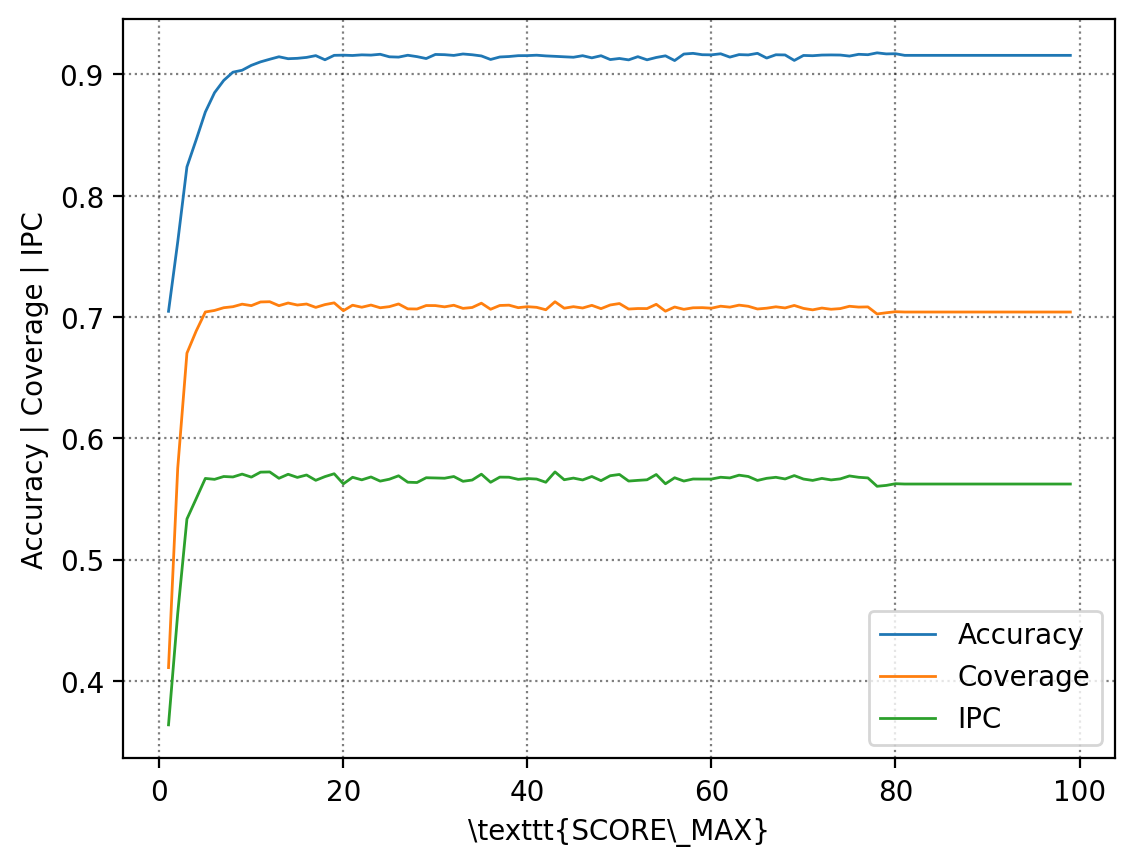

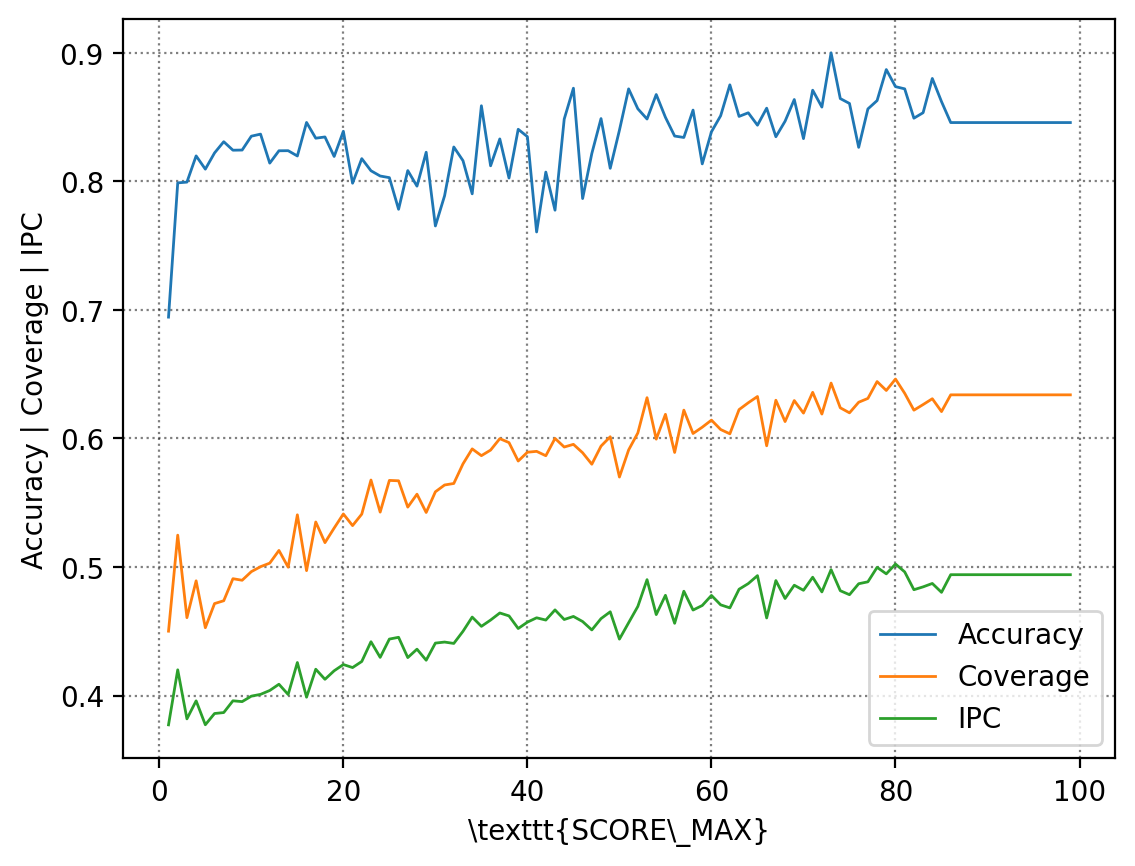

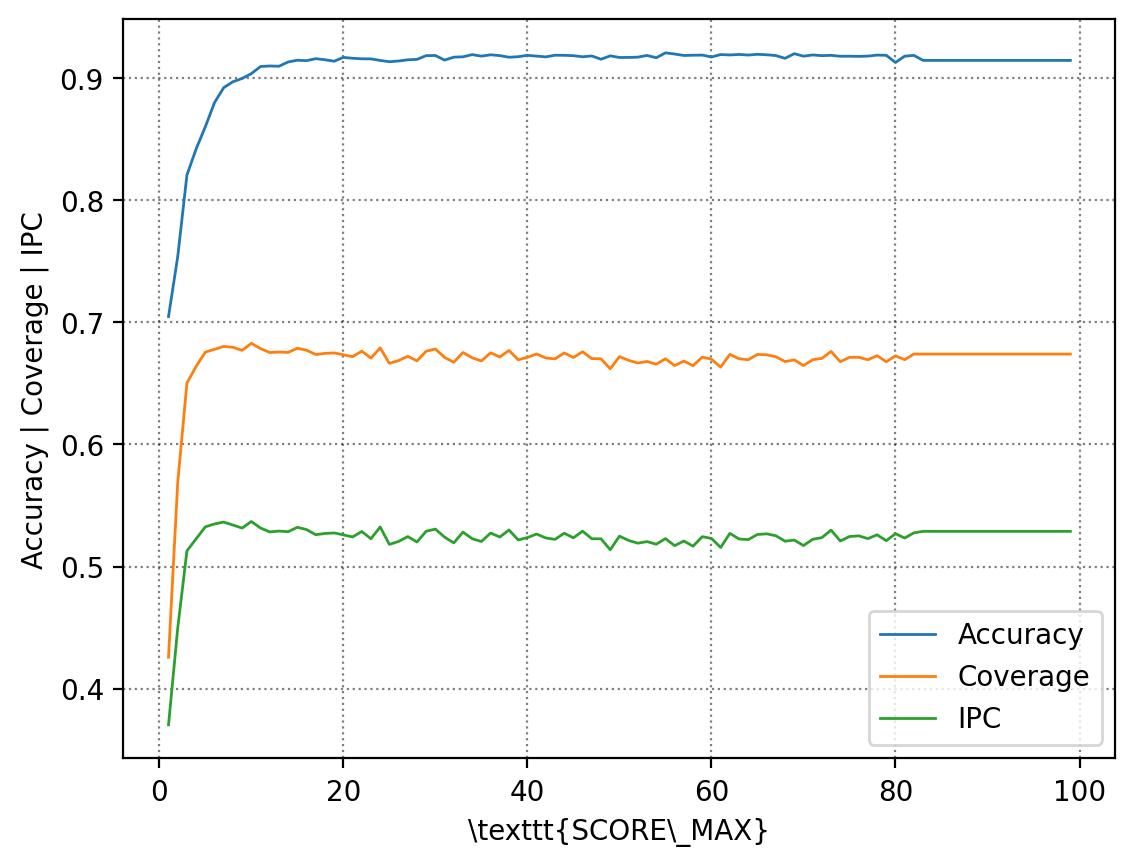

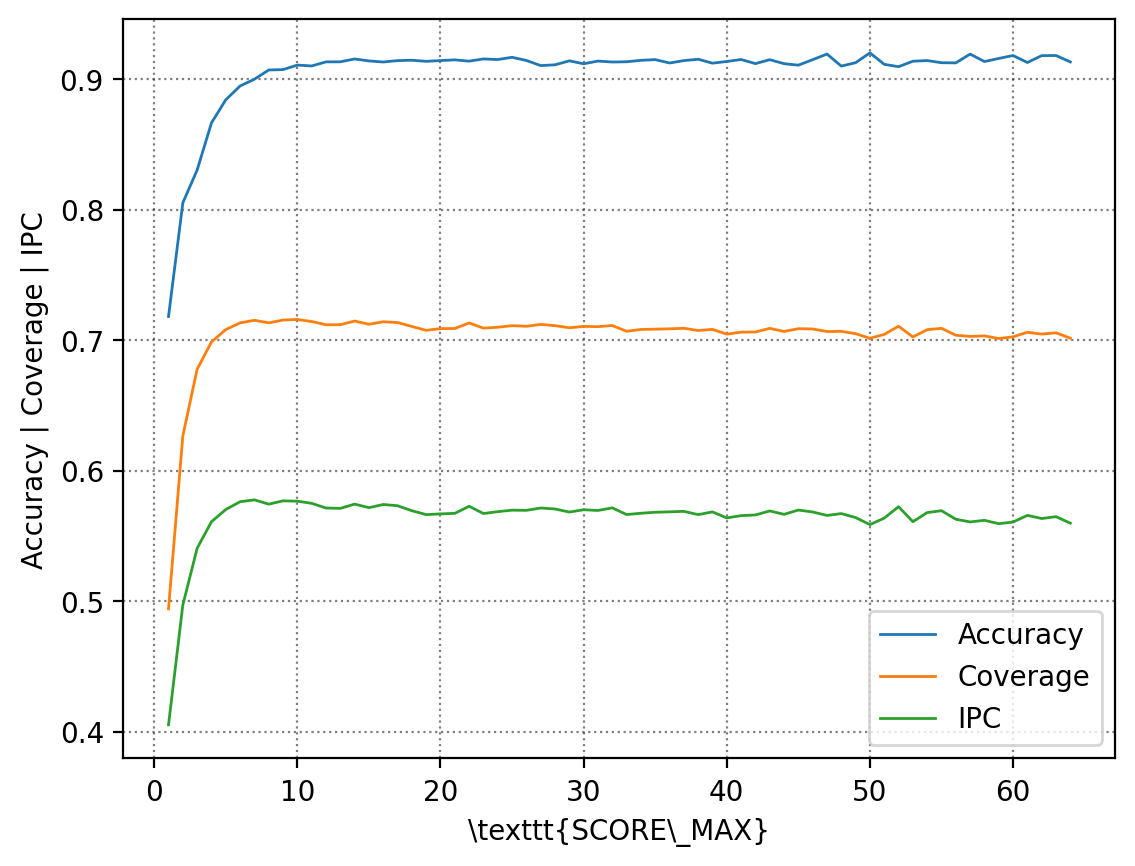

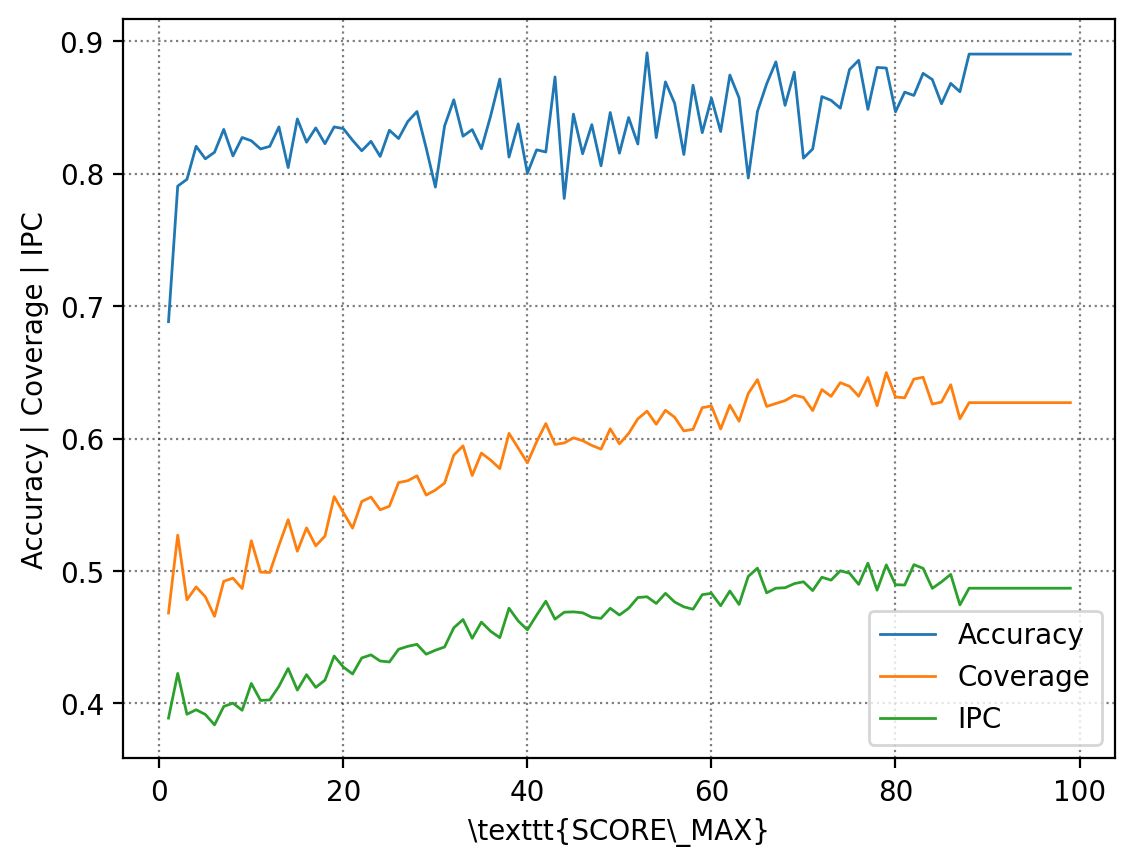

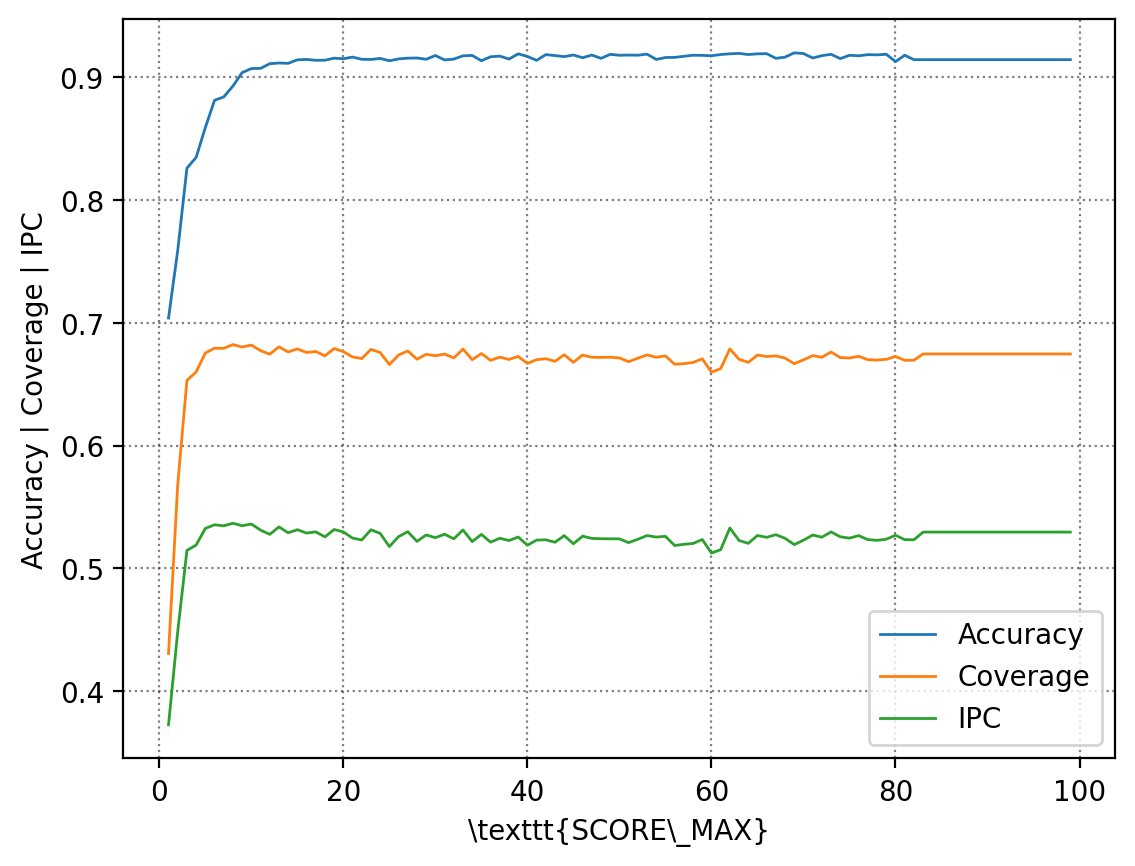

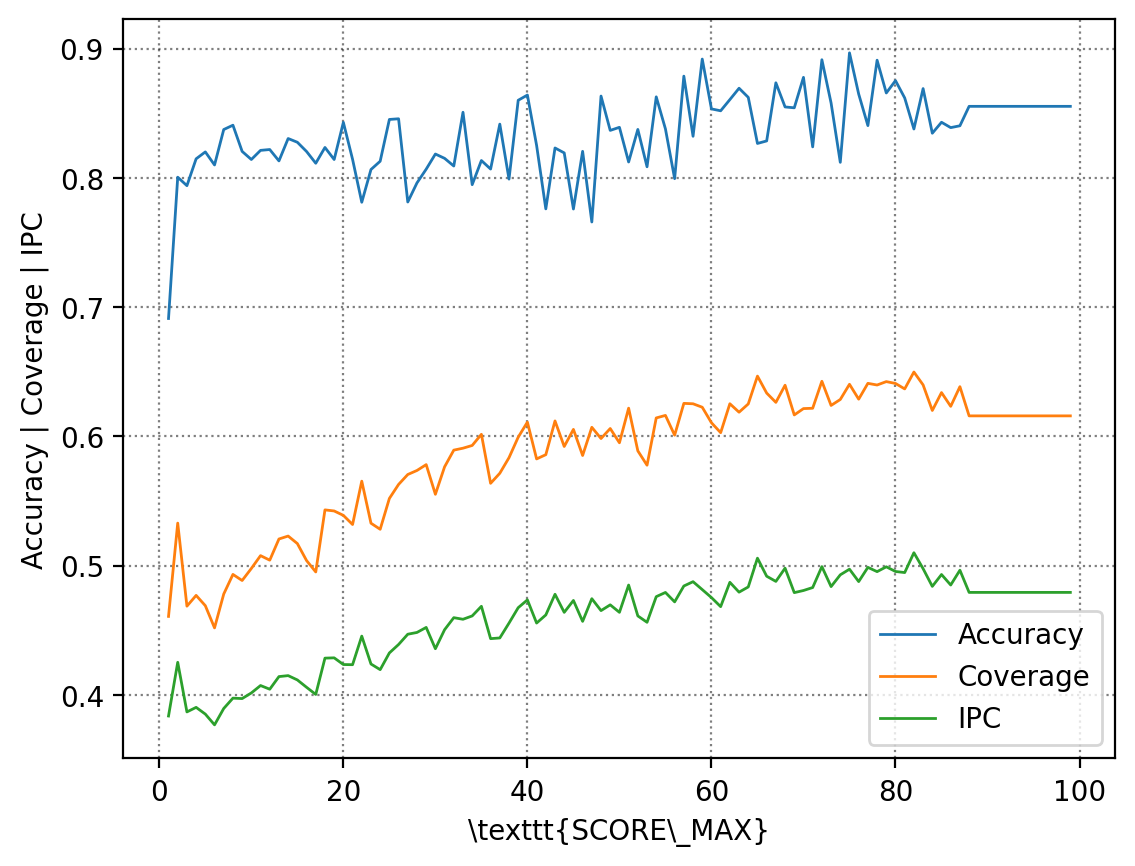

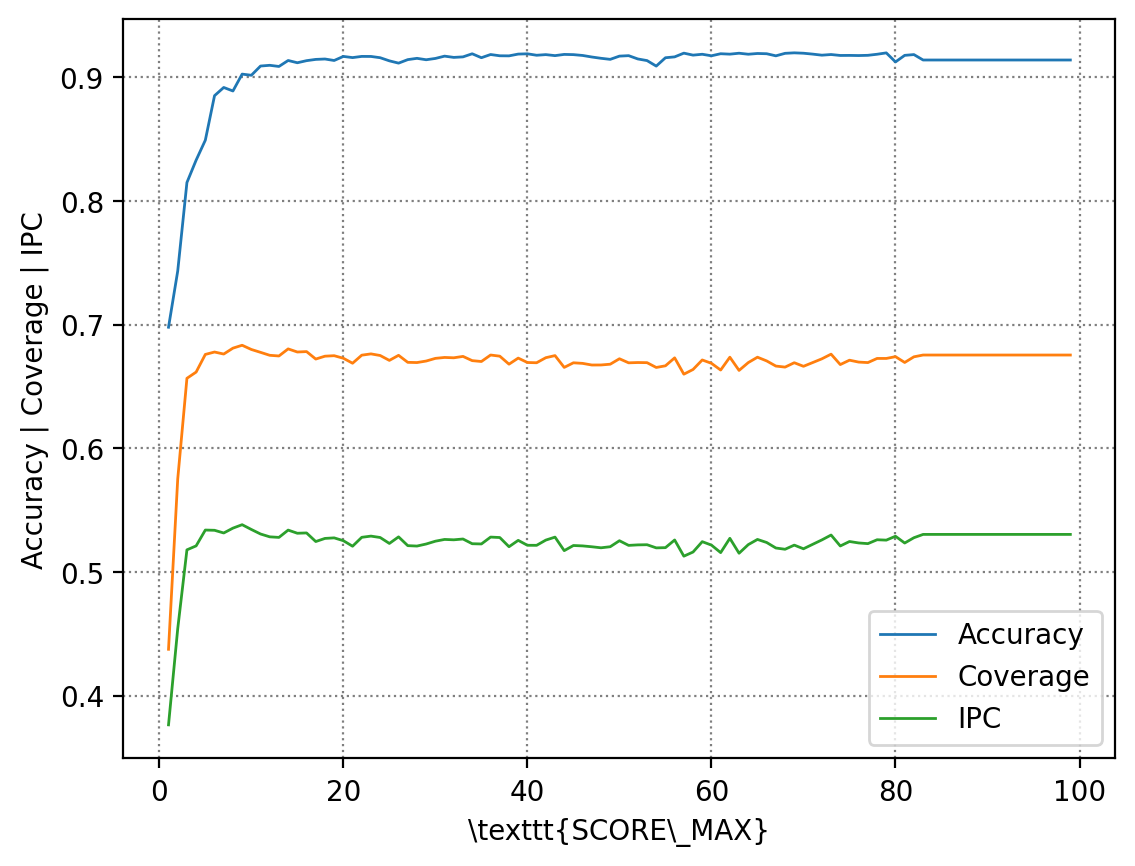

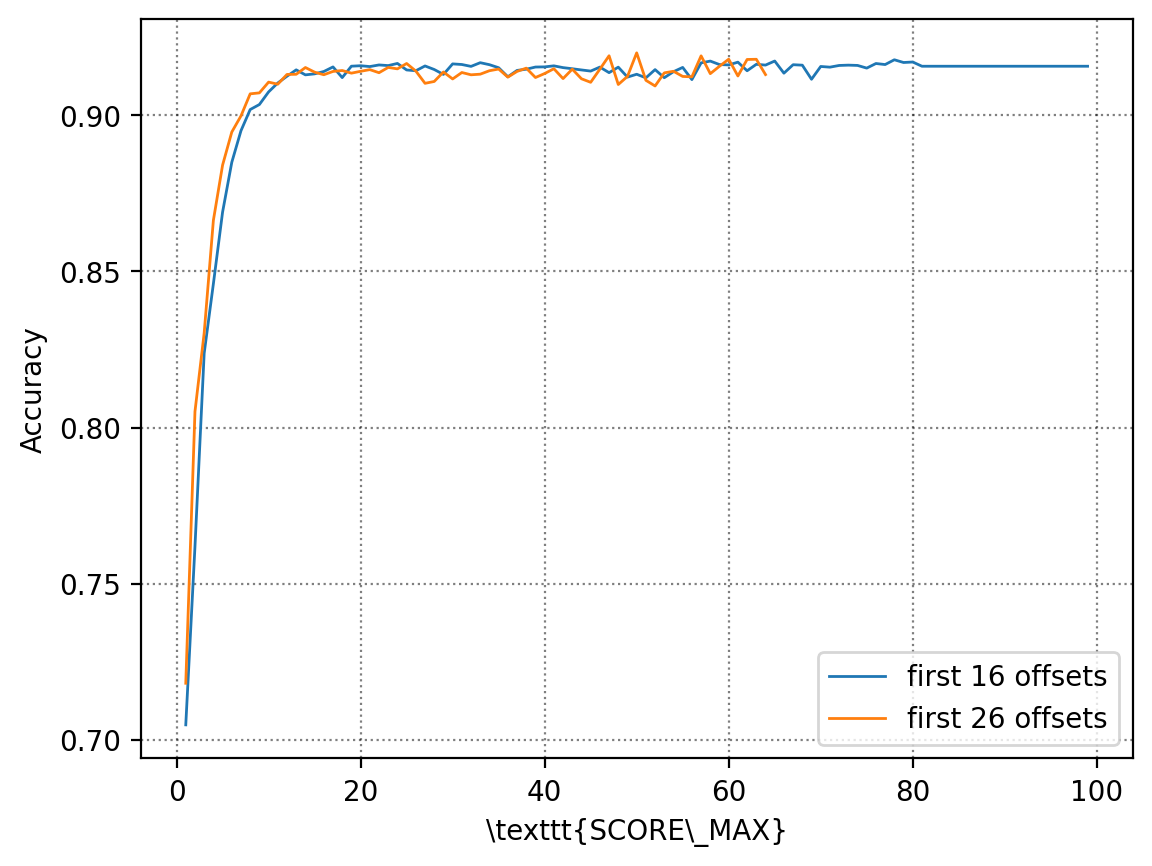

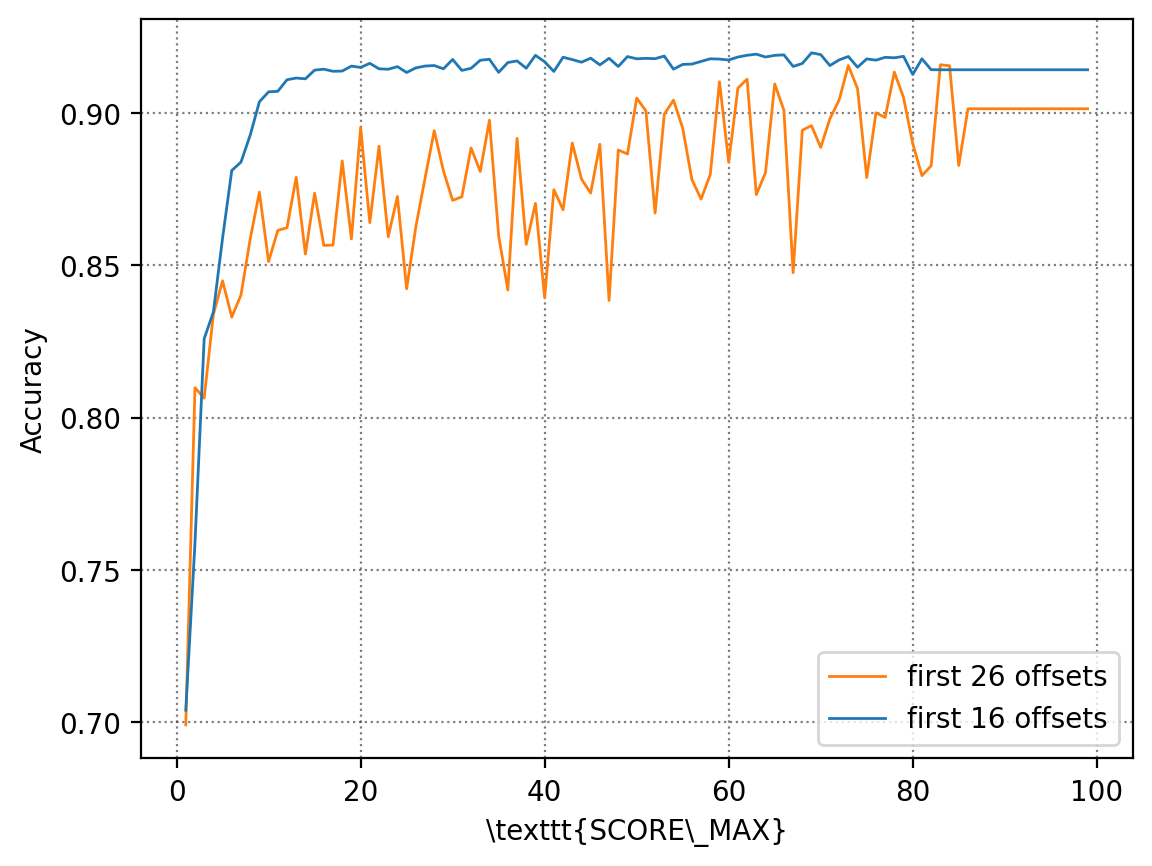

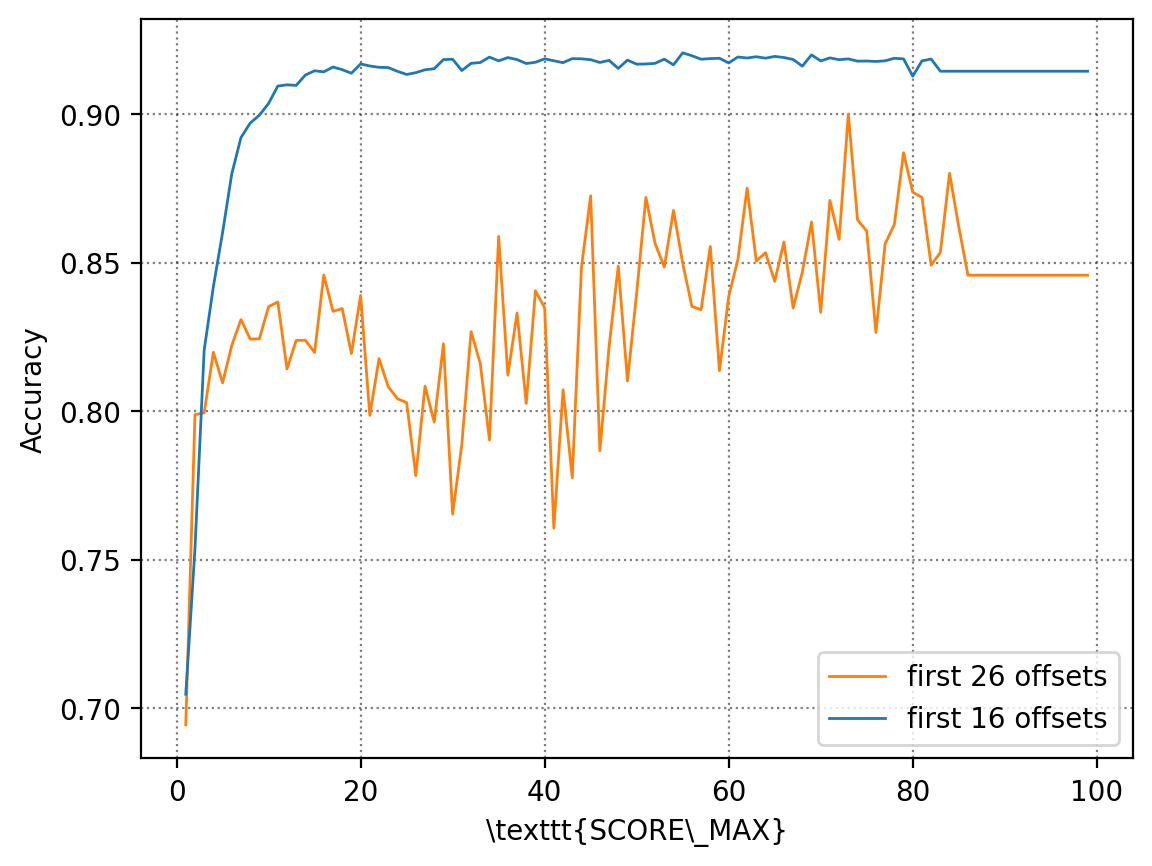

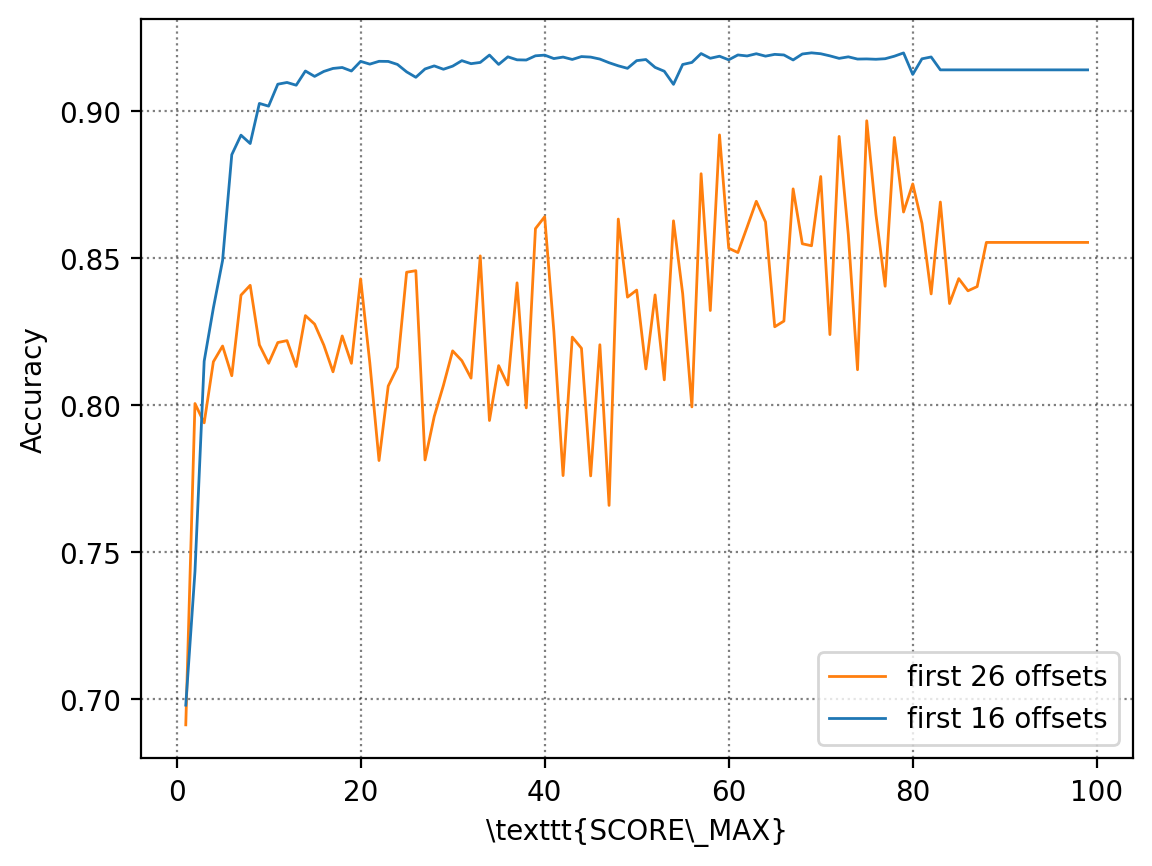

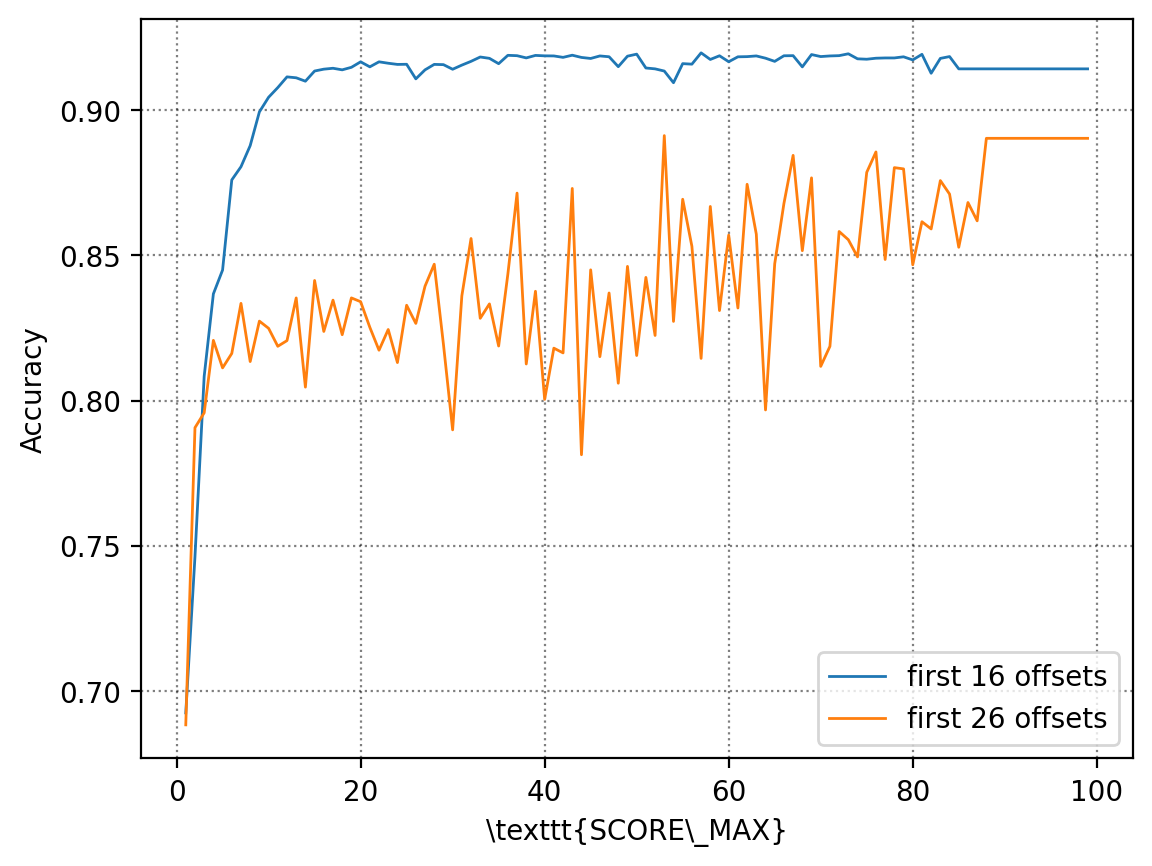

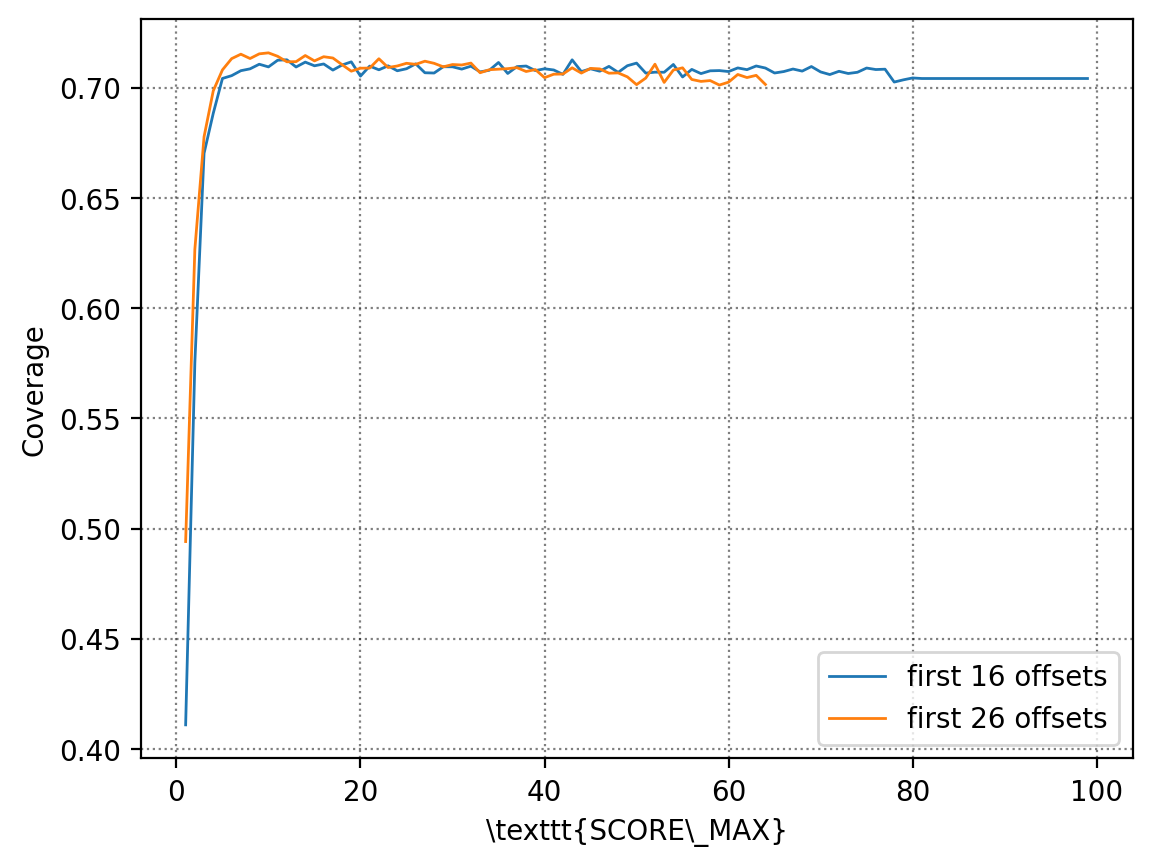

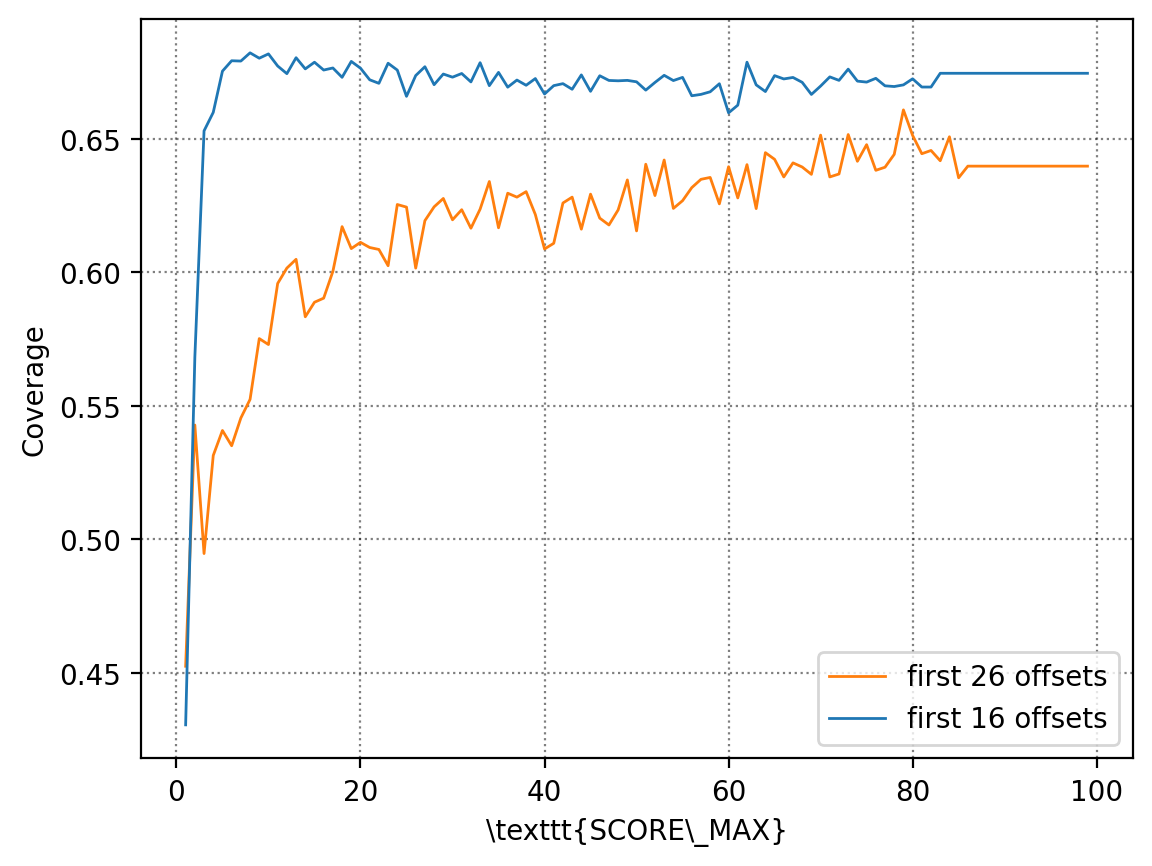

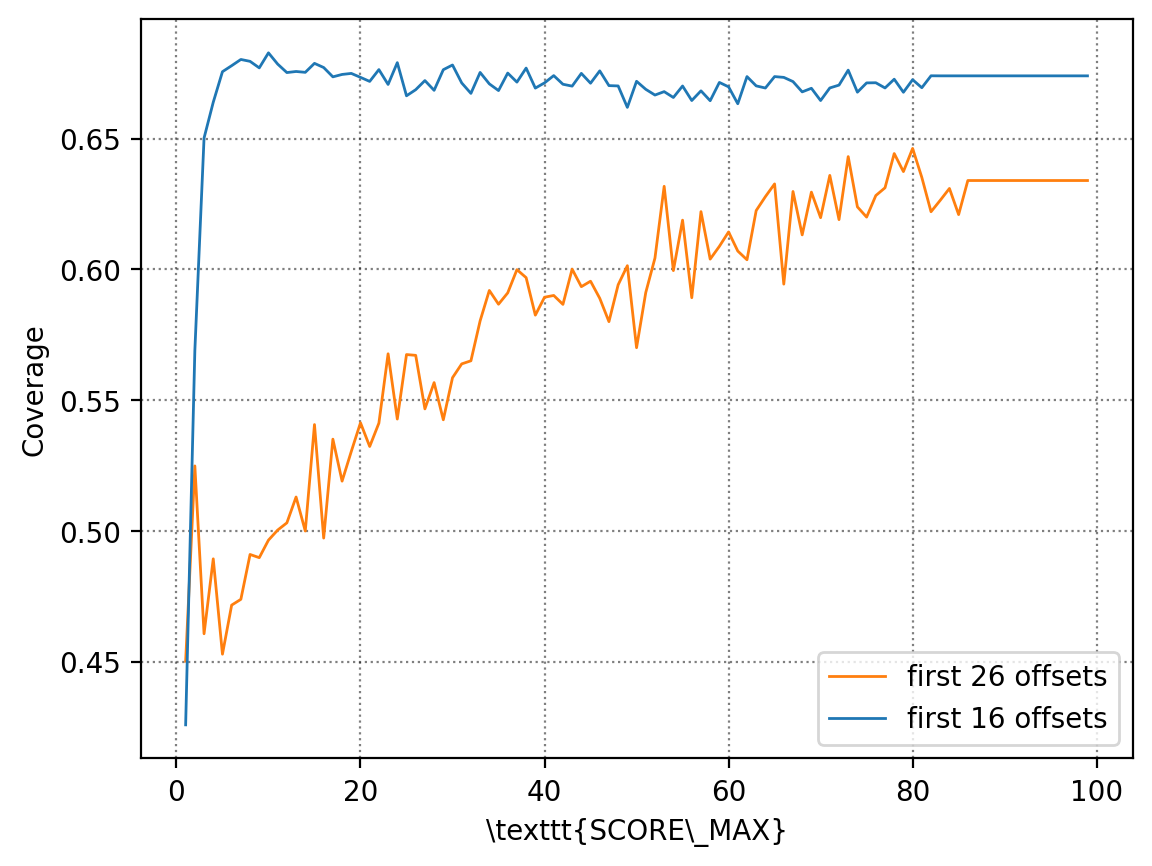

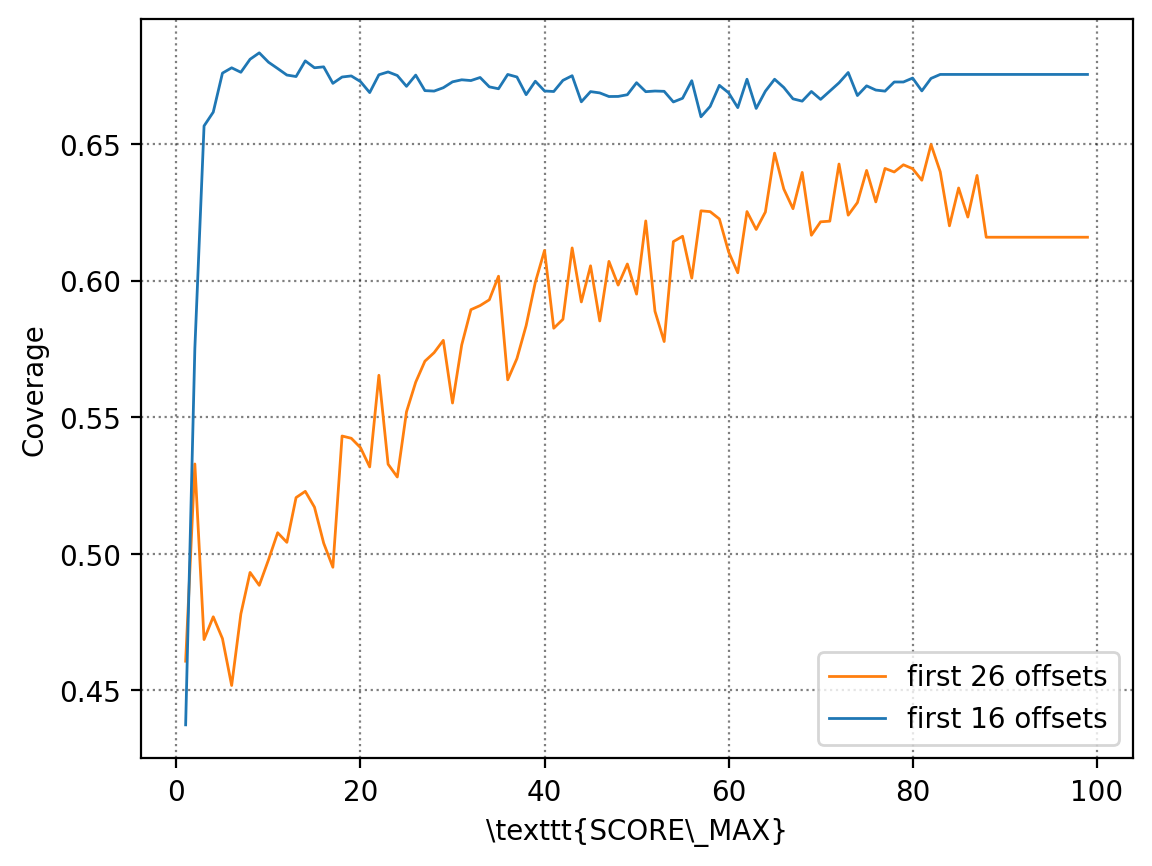

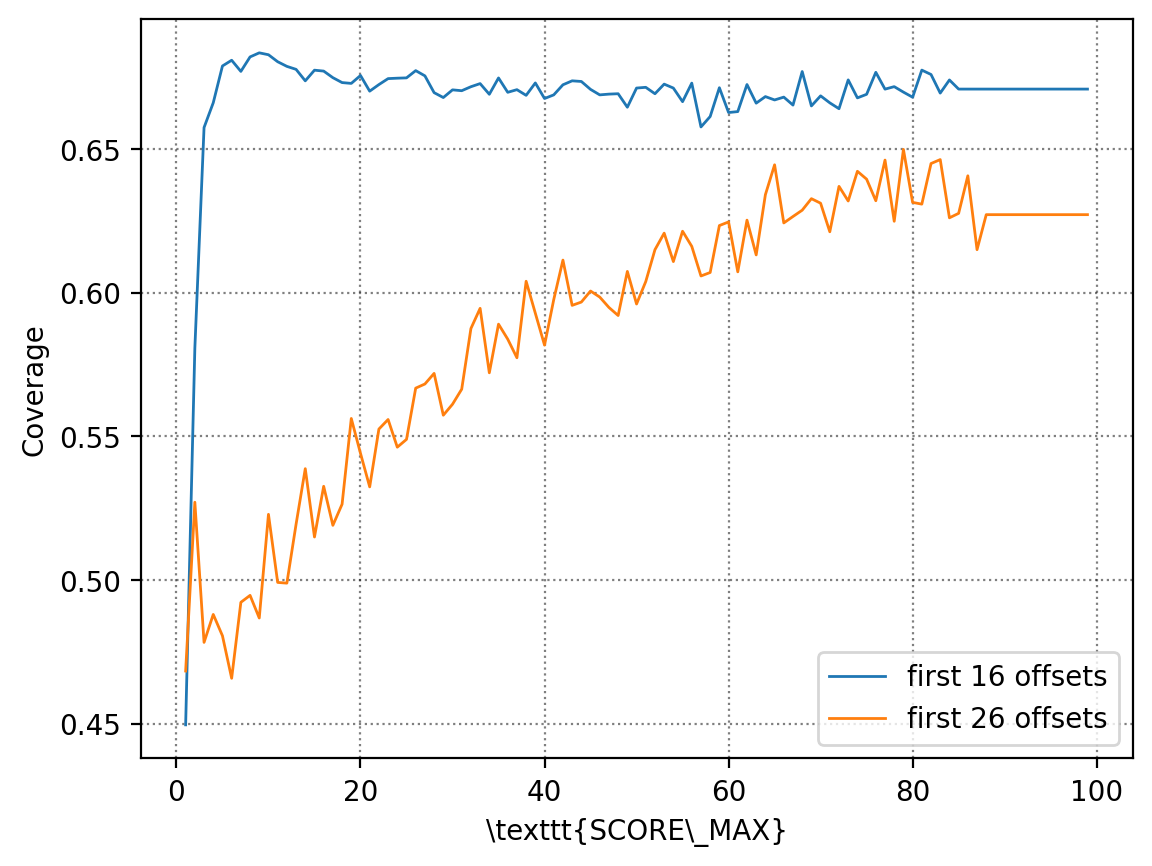

In [3]:
dir = 'Data'

all_ipc = []
all_accuracy = []
all_coverage = []
all_scoremax = []
foldername = []

for folder in os.scandir(dir):
    folder_str = folder.name
    foldername.append(folder_str)
    rr_size = folder_str[2:-9]
    num_offsets = folder_str[-2:]
    if int(folder_str[2:-9]) > 100:
        offset = 20
    else:
        offset = 19
    num_files = (len([name for name in os.listdir(folder) if os.path.isfile(os.path.join(folder, name))]))
    ipc      = [None] * num_files
    accuracy = [None] * num_files
    coverage = [None] * num_files
    scoremax = [i+1 for i in range(num_files)]

    for entry in os.scandir(folder):
        entry_str = entry.name
        with open(entry) as f:
            content = f.readlines()
            ipc[int(entry_str[offset:-17])-1]      = float(content[2][-8:])
            accuracy[int(entry_str[offset:-17])-1] = float(content[21][-8:])
            coverage[int(entry_str[offset:-17])-1] = float(content[22][-8:])
    
    all_ipc.append(ipc)
    all_accuracy.append(accuracy)
    all_coverage.append(coverage)
    all_scoremax.append(scoremax)

    fig, ax = plt.subplots()

    ax.plot(scoremax, accuracy, label = 'Accuracy', linewidth = lw)
    ax.plot(scoremax, coverage, label = 'Coverage', linewidth = lw)
    ax.plot(scoremax, ipc, label = 'IPC', linewidth = lw)

    ax.legend(loc = 'lower right')
    # ax.set_xlabel('SCORE_MAX')
    ax.set_xlabel('\\texttt{SCORE\_MAX}')
    ax.set_ylabel('Accuracy | Coverage | IPC')

    title = f'RR\_SIZE = {rr_size} | Possible offsets = {num_offsets}'
    # ax.set_title(title)

    plt.grid(ls = ':', color = 'black', alpha = 0.5)
    plt.show()

    if save:
        fig.savefig(f'Plot_pgf/RR={rr_size}_offsets={num_offsets}.pgf', format = 'pgf')
        fig.savefig(f'Plot/RR={rr_size}_offsets={num_offsets}.jpg')


RR = 16
while RR < 512:
        
    fig, ax = plt.subplots()

    for idx, value in enumerate(foldername):
        if value[2:-9] == str(RR):
            num_offsets = value[-2:]
            if num_offsets == str(16):
                ax.plot(all_scoremax[idx], all_accuracy[idx], label = f'first {num_offsets} offsets', linewidth = lw, color='tab:blue')
            if num_offsets == str(26):
                ax.plot(all_scoremax[idx], all_accuracy[idx], label = f'first {num_offsets} offsets', linewidth = lw, color='tab:orange')
            # ax.plot(all_scoremax[idx], all_accuracy[idx], label = f'first {num_offsets} offsets', linewidth = lw)


    ax.legend(loc = 'lower right')
    # ax.set_xlabel('SCORE_MAX')
    ax.set_xlabel('\\texttt{SCORE\_MAX}')
    ax.set_ylabel('Accuracy')
    title = f'RR\_SIZE = {RR}'
    # ax.set_title(title)
    plt.grid(ls = ':', color = 'black', alpha = 0.5)
    plt.show()

    if save:
        fig.savefig(f'Plot_pgf/RR={RR}_Accuracy.pgf', format = 'pgf')
        fig.savefig(f'Plot/RR={RR}_Accuracy.jpg')

    RR *= 2

RR = 16
while RR < 512:
        
    fig, ax = plt.subplots()

    for idx, value in enumerate(foldername):
        if value[2:-9] == str(RR):
            num_offsets = value[-2:]
            if num_offsets == str(16):
                ax.plot(all_scoremax[idx], all_coverage[idx], label = f'first {num_offsets} offsets', linewidth = lw, color='tab:blue')
            if num_offsets == str(26):
                ax.plot(all_scoremax[idx], all_coverage[idx], label = f'first {num_offsets} offsets', linewidth = lw, color='tab:orange')
            # ax.plot(all_scoremax[idx], all_coverage[idx], label = f'first {num_offsets} offsets', linewidth = lw)


    ax.legend(loc = 'lower right')
    # ax.set_xlabel('SCORE_MAX')
    ax.set_xlabel('\\texttt{SCORE\_MAX}')
    ax.set_ylabel('Coverage')
    title = f'RR\_SIZE = {RR}'
    # ax.set_title(title)
    plt.grid(ls = ':', color = 'black', alpha = 0.5)
    plt.show()

    if save:
        fig.savefig(f'Plot_pgf/RR={RR}_Coverage.pgf', format = 'pgf')
        fig.savefig(f'Plot/RR={RR}_Coverage.jpg')

    RR *= 2


In [4]:
best_ipc = 0
accuracy = 0
coverage = 0
scoremax = 0
folder = ''

for idx, value in enumerate(foldername):
    for idx2, value2 in enumerate(all_scoremax[idx]):
        ipc = all_ipc[idx][idx2]
        if ipc > best_ipc:
            best_ipc = ipc
            accuracy = all_accuracy[idx][idx2]
            coverage = all_coverage[idx][idx2]
            scoremax = value2
            folder = value

print(f'-----')
print(f'Best IPC: {best_ipc}')
print(f'Accuracy: {accuracy}')
print(f'Coverage: {coverage}')
print(f'Scoremax: {scoremax}')
print(f'Folder:   {folder}')

best_accuracy = 0
ipc = 0
accuracy = 0
coverage = 0
scoremax = 0
folder = ''

for idx, value in enumerate(foldername):
    for idx2, value2 in enumerate(all_scoremax[idx]):
        accuracy = all_accuracy[idx][idx2]
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            ipc = all_ipc[idx][idx2]
            accuracy = all_accuracy[idx][idx2]
            coverage = all_coverage[idx][idx2]
            scoremax = value2
            folder = value

print(f'-----')
print(f'IPC:           {ipc}')
print(f'Best accuracy: {best_accuracy}')
print(f'Coverage:      {coverage}')
print(f'Scoremax: {scoremax}')
print(f'Folder:   {folder}')



best_coverage = 0
ipc = 0
accuracy = 0
coverage = 0
scoremax = 0
folder = ''

for idx, value in enumerate(foldername):
    for idx2, value2 in enumerate(all_scoremax[idx]):
        coverage = all_coverage[idx][idx2]
        if coverage > best_coverage:
            best_coverage = coverage
            ipc = all_ipc[idx][idx2]
            accuracy = all_accuracy[idx][idx2]
            scoremax = value2
            folder = value

print(f'-----')
print(f'IPC:           {ipc}')
print(f'Accuracy:      {accuracy}')
print(f'Best coverage: {best_coverage}')
print(f'Scoremax: {scoremax}')
print(f'Folder:   {folder}')




best_product = 0
ipc = 0
accuracy = 0
coverage = 0
scoremax = 0
folder = ''

for idx, value in enumerate(foldername):
    for idx2, value2 in enumerate(all_scoremax[idx]):
        product = all_accuracy[idx][idx2] * all_coverage[idx][idx2]
        if product > best_product:
            best_product = product
            ipc = all_ipc[idx][idx2]
            accuracy = all_accuracy[idx][idx2]
            coverage = all_coverage[idx][idx2]
            scoremax = value2
            folder = value

print(f'-----')
print(f'Best product: {best_product}')
print(f'IPC:          {ipc}')
print(f'Accuracy:     {accuracy}')
print(f'Coverage:     {coverage}')
print(f'Scoremax: {scoremax}')
print(f'Folder:   {folder}')

-----
Best IPC: 0.577577
Accuracy: 0.899859
Coverage: 0.715169
Scoremax: 7
Folder:   RR16offsets26
-----
IPC:           0.52289
Best accuracy: 0.920615
Coverage:      0.670101
Scoremax: 55
Folder:   RR64offsets16
-----
IPC:           0.576559
Accuracy:      0.910683
Best coverage: 0.71578
Scoremax: 10
Folder:   RR16offsets26
-----
Best product: 0.65408147232
IPC:          0.574317
Accuracy:     0.91536
Coverage:     0.714562
Scoremax: 14
Folder:   RR16offsets26
